In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))
import pna_designer
import pandas as pd

%load_ext rpy2.ipython

In [2]:
database_location = "data/database"
silva = pna_designer.silva_manager(database_location)

taxpaths = silva.find_taxpath('Fungi')
print(taxpaths)
Fungi=taxpaths[0]

Total search results: 1

	Name:       Fungi
	Taxpath:  Eukaryota;Opisthokonta;Nucletmycea;Fungi;
	Taxonomic rank:      kingdom
	Number of sequence entries:      29123
['Eukaryota;Opisthokonta;Nucletmycea;Fungi;']


In [3]:
F='GTGYCAGCMGCCGCGGTAA'
R='CCGYCAATTYMTTTRAGTTT'
Medicago_sativa = 'GAFF01033989.4391.6188'

designer_gPNA = pna_designer.PNA_Designer(result_file='data/gPNA.csv',target_silva_accession=Medicago_sativa,
                             sequence_silva_path=Fungi,
                             primer_F=F,primer_R=R,kmer_range=(9,13),database_dir='data/database')

Amplifying PNA target
Amplifying and Collecting sequence K-mers
Mapping Kmers
Mapping Complete


In [4]:
gPNA = pd.read_csv('data/gPNA.csv')
Msativa_seq = designer_gPNA.target
gPNA_target = "CGGCCGCTACGC"
print(Msativa_seq)
Msativa_seq = Msativa_seq[1]
gPNA['pna_map'] = pna_designer.map_PNA(Msativa_seq,gPNA_target)

('GAFF01033989.4391.6188', 'GTGCCAGCAGCCGCGGTAATTCCAGCTCCAATAGCGTATATTTAAGTTGTTGCAGTTAAAAAGCTCGTAGTTGGACCTTGGGTTGGGTCGATCGGTCCGCCTATGGTGTGCACCGGTTGGCTCGTCCCTTCTGCCGGCGATGCGCTCCTGGCCTTAATTGGCCGGGTCGTGCCTCCGGCGCTGTTACTTTGAAGAAATTAGAGTGCTCAAAGCAAGCCTACGCTCTGGATACATTAGCATGGGATAACACCACAGGATTCTGATCCTATTGTGTTGGCCTTCGGGATCGGAGTAATGATTAACAGGGACAGTCGGGGGCATTCGTATTTCATAGTCAGAGGTGAAATTCTTGGATTTATGAAAGACGAACAACTGCGAAAGCATTTGCCAAGGATGTTTTCATTAATCAAGAACGAAAGTTGGGGGCTCGAAGACGATCAGATACCGTCCTAGTCTCAACCATAAACGATGCCGACCAGGGATCAGCGGATGTTGCTTTTAGGACTCCGCTGGCACCTTATGAGAAATCAAAGTCTTTGGGTTCCGGGGGGAGTATGGTCGCAAGGCTGAAACTTAAAGGAATTGACGGA')


/home/spiridon/anaconda3/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Need help getting started? Try the cookbook for R:
http://www.cookbook-r.com/Graphs/

  warnings.warn(x, RRuntimeWarning)


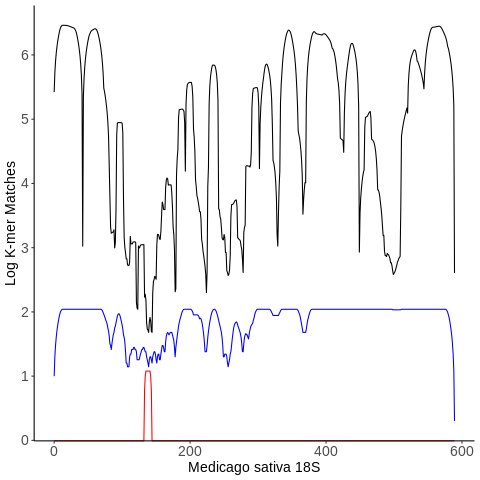

In [5]:
%%R -i gPNA
library('ggplot2')

axis_text_size = 14

plt<-ggplot(gPNA,aes(x=index,y=absolute.match))+
    geom_line()+
    geom_line(aes(y=unique.match),color='blue')+
    geom_line(aes(y=pna_map),color = 'red')+
    scale_y_log10(
      breaks = scales::trans_breaks("log10", function(x) 10^x),
      labels = scales::trans_format("log10", scales::math_format(.x)))+
    theme_bw()+
    theme(panel.border = element_blank(), panel.grid.minor = element_blank(),panel.grid.major = element_blank(),
       axis.line = element_line(color="black"),
       axis.text = element_text(size=axis_text_size),
       axis.title=element_text(size=axis_text_size))+
    labs(y="Log K-mer Matches",x="Medicago sativa 18S")
print(plt)
ggsave('figures/gPNA.png',plot=plt,width=6,height=6,device='png',dpi=900)


# mPNA and pPNA

In [6]:
greengenes_fasta = "data/gg_97_otus_4feb2011.fasta"
F515 = "GTGCCAGCMGCCGCGGTAA"
R806 = "GGACTACHVGGGTWTCTAAT"
designer_pPNA = pna_designer.PNA_Designer(result_file='data/pPNA.csv',
                                          target_fastafile="data/A_thaliana_chloroplast.fasta",
                                          sequence_file=greengenes_fasta,
                                          primer_F=F515,primer_R=R806,
                                          kmer_range=(9,13))

Amplifying PNA target
Amplifying and Collecting sequence K-mers
Mapping Kmers
Mapping Complete


In [7]:
pPNA = pd.read_csv('data/pPNA.csv')
thaliana_chloroplast_seq = designer_pPNA.target
pPNA_target = "GGCTCAACCCTGGACAG"
print(thaliana_chloroplast_seq)
thaliana_chloroplast_seq = thaliana_chloroplast_seq[1]
pPNA['pna_map'] = pna_designer.map_PNA(thaliana_chloroplast_seq,pPNA_target)

('>AP000423.1 Arabidopsis_thaliana_chloroplast', 'GTGCCAGCAGCCGCGGTAATACAGAGGATGCAAGCGTTATCCGGAATGATTGGGCGTAAAGCGTCTGTAGGTGGCTTTTTAAGTCCGCCGTCAAATCCCAGGGCTCAACCCTGGACAGGCGGTGGAAACTACCAAGCTTGAGTACGGTAGGGGCAGAGGGAATTTCCGGTGGAGCGGTGAAATGCGTAGAGATCGGAAAGAACACCAACGGCGAAAGCACTCTGCTGGGCCGACACTGACACTGAGAGACGAAAGCTAGGGGAGCGAATGGGATTAGATACCCCAGTAGTCCT')


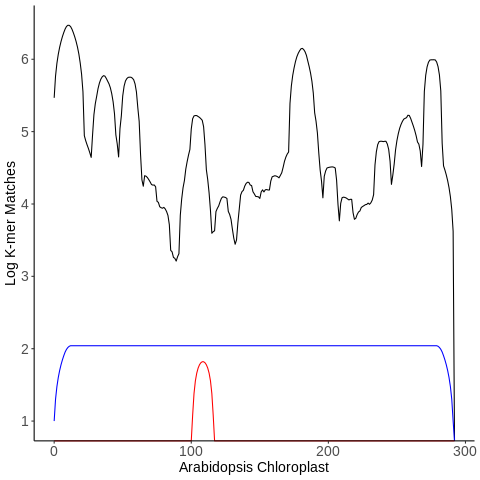

In [8]:
%%R -i pPNA
library('ggplot2')

axis_text_size = 14

plt<-ggplot(pPNA,aes(x=index,y=absolute.match))+
    geom_line(color='black')+
    geom_line(aes(y=unique.match),color='blue')+
    geom_line(aes(y=pna_map),color = 'red')+
    scale_y_log10(
      breaks = scales::trans_breaks("log10", function(x) 10^x),
      labels = scales::trans_format("log10", scales::math_format(.x)))+
    theme_bw()+
    theme(panel.border = element_blank(), panel.grid.minor = element_blank(),panel.grid.major = element_blank(),
       axis.line = element_line(color="black"),
       axis.text = element_text(size=axis_text_size),
       axis.title=element_text(size=axis_text_size))+
    labs(y="Log K-mer Matches",x="Arabidopsis Chloroplast")

print(plt)
ggsave('figures/pPNA.png',plot=plt,width=6,height=6,device='png',dpi=900)


In [9]:
#http://greengenes.lbl.gov/Download/Sequence_Data/Fasta_data_files/Caporaso_Reference_OTUs/gg_otus_4feb2011.tgz
#Then you must decompress
greengenes_fasta = "data/gg_97_otus_4feb2011.fasta"
F515 = "GTGCCAGCMGCCGCGGTAA"
R806 = "GGACTACHVGGGTWTCTAAT"
designer_mPNA = pna_designer.PNA_Designer(result_file='data/mPNA.csv',
                                          target_fastafile="data/A_thaliana_mitochondria.fasta",
                                          sequence_file=greengenes_fasta,
                                          primer_F=F515,primer_R=R806,
                                          kmer_range=(9,13))

Amplifying PNA target
Amplifying and Collecting sequence K-mers
Mapping Kmers
Mapping Complete


In [10]:
mPNA = pd.read_csv('data/mPNA.csv')
thaliana_mitochondria_seq = designer_mPNA.target
mPNA_target = "GGCAAGTGTTCTTCGGA"
print(thaliana_mitochondria_seq)
thaliana_mitochondria_seq = thaliana_mitochondria_seq[1]
mPNA['pna_map'] = pna_designer.map_PNA(thaliana_mitochondria_seq,mPNA_target)

('>JF729201.1 Arabidopsis_thaliana_mitochondria', 'GTGCCAGCAGCCGCGGTAATACGGGGGGGGCAAGTGTTCTTCGGAATGACTGGGCGTAAAGGGCACGTAGGCGGTGAATCGGGTTGAAAGTGAAAGTCGCCAAAAAGTGGCGGAATGCTTTCGAAACCAATTCACTTGAGTGAGACAGAGGAGAGTGGAATTTCGTGTGGAGGGGTGAAATCTACAGATCTACGAAGGAACGCCAAAAGCGAAGGCAGCTCTCTGGGTCCCTACCGACGCTGGGGGTGCGAAAGCATGGGGGAGCGAACGGGATTAGATACCCTGGTAGTCCA')


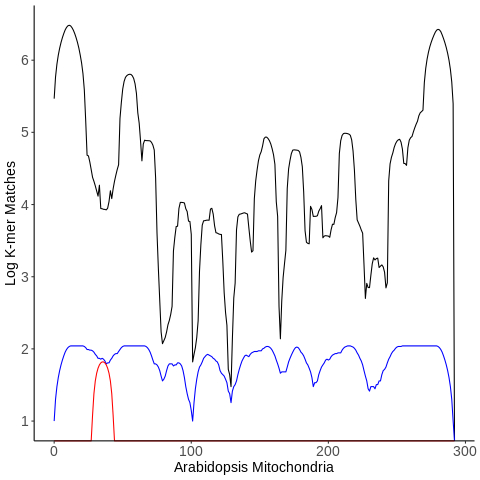

In [11]:
%%R -i mPNA
library('ggplot2')

axis_text_size = 14

plt<-ggplot(mPNA,aes(x=index,y=absolute.match))+
    geom_line()+
    geom_line(aes(y=unique.match),color='blue')+
    geom_line(aes(y=pna_map),color = 'red')+
    scale_y_log10(
      breaks = scales::trans_breaks("log10", function(x) 10^x),
      labels = scales::trans_format("log10", scales::math_format(.x)))+
    theme_bw()+
    theme(panel.border = element_blank(), panel.grid.minor = element_blank(),panel.grid.major = element_blank(),
       axis.line = element_line(color="black"),
       axis.text = element_text(size=axis_text_size),
       axis.title=element_text(size=axis_text_size))+
    labs(y="Log K-mer Matches",x="Arabidopsis Mitochondria")

print(plt)        
        
ggsave('figures/mPNA.png',plot=plt,width=6,height=6,device='png',dpi=900)


# Justifying the orientation of the PNA

In [11]:
def kmerize(DNA,krng,rc=True,size_mapped=False):
    seq_kmers=set()
    for i in range(0,len(DNA)):
        for k in krng:
            if i+k<len(DNA):
                seq_kmers.add(DNA[i:i+k])
                if rc:
                    seq_kmers.add(pna_designer.InSilico_PCR.reverse_complement(DNA[i:i+k]))
    if size_mapped:
        seq_kmers_mapped={}
        for i in krng:
            seq_kmers_mapped[i]=set()
        for seq in seq_kmers:
            seq_kmers_mapped[len(seq)].add(seq)
        return(seq_kmers_mapped)
    return(seq_kmers)


def Enumerate_Kmers(target_seq,sequences,krng=(8,12)):
    print("Enumerating {} for k-mer range {}-{} in {} sequences".format(target_seq,krng[0],krng[1],str(len(sequences))))
    krng = list((range(krng[0],krng[1]+1)))
    targ_k = kmerize(target_seq,krng,rc=False)
    #must account for reverse
    targ_k.union(kmerize(target_seq[::-1],krng,rc=False))
    knum=[]
    tot=len(sequences)
    for i,sequence in enumerate(sequences):
        print("{}% Complete".format(str(round(i/tot*100,2))),end='\r')
        seq_kmers = kmerize(sequence,krng)
        knum.append(len(targ_k.intersection(seq_kmers)))
    print("100% Complete")  
    return(knum)


gPNA = "CGGCCGCTACGC"

gPNA_alternate = "GCCGGCGATGCG"

accessions = silva.get_accessions(Fungi)
fungi_seqs=silva.get_seqs(accessions)

In [5]:
#I NEED TO REDO THIS WITH THE AMPLIFIED SUBSET ONLY!
gPNA_enumerate=Enumerate_Kmers(gPNA,[entry[1] for entry in fungi_seqs])
gPNA_alternate_enumerate=Enumerate_Kmers(gPNA_alternate,[entry[1] for entry in fungi_seqs])

df=pd.DataFrame({'gPNA':gPNA_enumerate,'alternate':gPNA_alternate_enumerate})

NameError: name 'gPNA_enumerate' is not defined

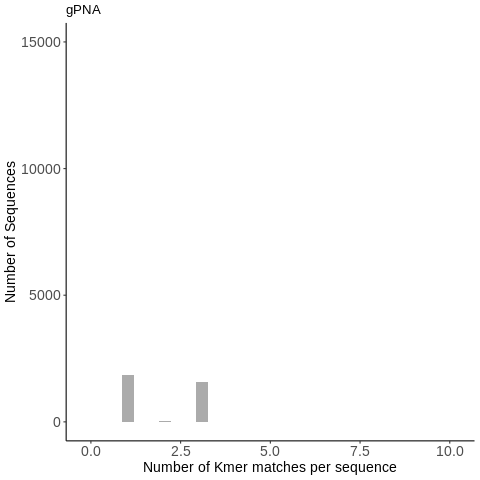

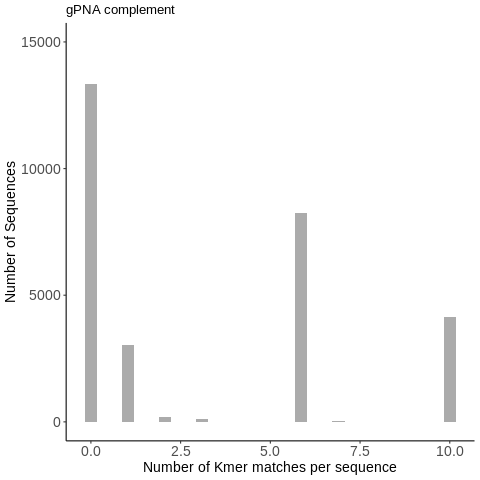

In [31]:
%%R -i df

axis_text_size = 14

gPNA<-ggplot(df, aes(x=gPNA)) + 
  geom_histogram(alpha=.5)+
  theme_bw()+
    theme(panel.border = element_blank(), panel.grid.minor = element_blank(),panel.grid.major = element_blank(),
       axis.line = element_line(color="black"),
       axis.text = element_text(size=axis_text_size),
       axis.title=element_text(size=axis_text_size))+
    labs(title = 'gPNA',y="Number of Sequences",x="Number of Unique Kmer matches per sequence")+
     ylim(c(0,15000))


alternate <-ggplot(df, aes(x=alternate)) + 
  geom_histogram(alpha=.5)+
  theme_bw()+
    theme(panel.border = element_blank(), panel.grid.minor = element_blank(),panel.grid.major = element_blank(),
       axis.line = element_line(color="black"),
       axis.text = element_text(size=axis_text_size),
       axis.title=element_text(size=axis_text_size))+
    labs(title = 'gPNA complement',y="Number of Sequences",x="Number of Unique Kmer matches per sequence")+
  ylim(c(0,15000))

ggsave('figures/gPNA_fungal_kmercount.png',plot=gPNA,width=6,height=6,device='png',dpi=900)

ggsave('figures/gPNAcomplement_fungal_kmercount.png',plot=alternate,width=6,height=6,device='png',dpi=900)


print(gPNA)
print(alternate)

In [9]:
def Identify_Collateral(target_seq,sequences,krng,Pf,Pr):
    acession_metadata = {}
    cols=['accession','path','organism_name']
    for row in silva.db.taxmap_lookup('accession',[el[0] for el in sequences],cols):
        acession_metadata[row['accession']]= [row[col] for col in cols]
    print("Enumerating {} for k-mer range {}-{} in {} sequences".format(target_seq,krng[0],krng[1],str(len(sequences))))
    
    krng = list((range(krng[0],krng[1]+1)))
    targ_k = kmerize(target_seq,krng,rc=False)
    #must account for reverse
    targ_k.union(kmerize(target_seq[::-1],krng,rc=False))
    knum=[]
    tot=len(sequences)
    for i,sequence in enumerate(sequences):
        print("{}% Complete".format(str(round(i/tot*100,2))),end='\r')
        seq_kmers = kmerize(sequence[1],krng,True,True)
        dat = acession_metadata[sequence[0]]
        for el in krng:
            dat.append(len(targ_k.intersection(seq_kmers[el])))
        knum.append(dat)
    print("100% Complete")  
    return(knum)

In [42]:
#preping fungal sequences
F='GTGYCAGCMGCCGCGGTAA'
R='CCGYCAATTYMTTTRAGTTT'
gPNA = "CGGCCGCTACGC"
accessions = silva.get_accessions(Fungi)
fungi_seqs=silva.get_seqs(accessions)
fungi_V4=[]
numfungi=len(fungi_seqs)
for i,entry in enumerate(fungi_seqs):
    print("{}% Complete".format(str(round(i/numfungi*100,2))),end='\r')

    accession,seq=entry
    try:
        V4 = pna_designer.InSilico_PCR.sim_amplify(F,R,seq)
    except pna_designer.InSilico_PCR.PrimerError:
        V4=''
    if V4:
        fungi_V4.append((accession,V4))
print("100% Complete")  
    

100% Completete


In [46]:
krng=(5,12)
dat = Identify_Collateral(gPNA,fungi_V4,krng,F,R)

Enumerating CGGCCGCTACGC for k-mer range 5-12 in 26383 sequences
100% Completete


In [55]:
df = pd.DataFrame(dat)
krng_col = ['Kmer Size:'+str(el) for el in list((range(krng[0],krng[1]+1)))]
df.columns = ['accession','path','organism name']+krng_col
krng_col.reverse()
df = df.sort_values(by=krng_col,ascending=False)
df.to_csv('data/fungi_kmers_gPNAmatches.csv',index=False)

In [54]:
df

,accession,path,organism name,Kmer Size:5,Kmer Size:6,Kmer Size:7,Kmer Size:8,Kmer Size:9,Kmer Size:10,Kmer Size:11,Kmer Size:12
2450,AF113415.1.1762,Eukaryota;Opisthokonta;Nucletmycea;Fungi;Mucor...,Chlamydoabsidia padenii,6,4,3,2,0,0,0,0
2526,AF157118.1.1818,Eukaryota;Opisthokonta;Nucletmycea;Fungi;Mucor...,Absidia glauca,6,4,3,2,0,0,0,0
5383,CCXP01022255.1.1776,Eukaryota;Opisthokonta;Nucletmycea;Fungi;Mucor...,Parasitella parasitica,6,4,3,2,0,0,0,0
8978,EU847655.1.1390,Eukaryota;Opisthokonta;Nucletmycea;Fungi;Mucor...,Cunninghamella sp. A18,6,4,3,2,0,0,0,0
15578,JQ004925.1.1715,Eukaryota;Opisthokonta;Nucletmycea;Fungi;Mucor...,Absidia glauca,6,4,3,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
26249,X84326.1.1804,Eukaryota;Opisthokonta;Nucletmycea;Fungi;Dikar...,Rhodotorula mucilaginosa,2,0,0,0,0,0,0,0
9083,FAXO01000016.716447.718240,Eukaryota;Opisthokonta;Nucletmycea;Fungi;Dikar...,Microbotryum violaceum,1,0,0,0,0,0,0,0
14747,JDSM01039259.1327.2993,Eukaryota;Opisthokonta;Nucletmycea;Fungi;Dikar...,Limnephilus lunatus,1,0,0,0,0,0,0,0
15651,JQ008892.1.1654,Eukaryota;Opisthokonta;Nucletmycea;Fungi;Dikar...,Spathaspora sp. BG090815.8.3.1.3.16,1,0,0,0,0,0,0,0


In [4]:
taxpaths = silva.find_taxpath('Eukaryota')
print(taxpaths)
Euk=taxpaths[0]

Total search results: 1

	Name:       Eukaryota
	Taxpath:  Eukaryota;
	Taxonomic rank:      domain
	Number of sequence entries:      162003
['Eukaryota;']


In [7]:
#preping Euk sequences
F='GTGYCAGCMGCCGCGGTAA'
R='CCGYCAATTYMTTTRAGTTT'
gPNA = "CGGCCGCTACGC"
accessions = silva.get_accessions(Euk)
Euk_seqs=silva.get_seqs(accessions)
Euk_V4=[]
numEuk=len(Euk_seqs)
for i,entry in enumerate(Euk_seqs):
    print("{}% Complete".format(str(round(i/numEuk*100,2))),end='\r')

    accession,seq=entry
    try:
        V4 = pna_designer.InSilico_PCR.sim_amplify(F,R,seq)
    except pna_designer.InSilico_PCR.PrimerError:
        V4=''
    if V4:
        Euk_V4.append((accession,V4))
print("100% Complete")  
    

100% Completete


In [12]:
krng=(5,12)
dat = Identify_Collateral(gPNA,Euk_V4,krng,F,R)

Enumerating CGGCCGCTACGC for k-mer range 5-12 in 135850 sequences
100% Completete


In [14]:
df = pd.DataFrame(dat)

In [16]:
krng_col = ['Kmer Size:'+str(el) for el in list((range(krng[0],krng[1]+1)))]
df.columns = ['accession','path','organism name']+krng_col
krng_col.reverse()
df = df.sort_values(by=krng_col,ascending=False)
df

,accession,path,organism name,Kmer Size:5,Kmer Size:6,Kmer Size:7,Kmer Size:8,Kmer Size:9,Kmer Size:10,Kmer Size:11,Kmer Size:12
2020,JN938582.1.1674,Eukaryota;Haptophyta;Prymnesiophyceae;Isochrys...,Isochrysis sp. LL-2012,7,5,4,3,2,1,0,0
10516,KR048722.1.1662,Eukaryota;Opisthokonta;Holozoa;Metazoa (Animal...,Haplostoma kimi,7,5,4,3,2,1,0,0
14849,AM490998.1.1720,Eukaryota;Haptophyta;Prymnesiophyceae;Isochrys...,Chrysotila lamellosa,7,5,4,3,2,1,0,0
15620,KC888095.1.1731,Eukaryota;Haptophyta;Prymnesiophyceae;Isochrys...,Chrysotila lamellosa,7,5,4,3,2,1,0,0
15621,KC888096.1.1731,Eukaryota;Haptophyta;Prymnesiophyceae;Isochrys...,Chrysotila lamellosa,7,5,4,3,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
100704,AJ012524.1.1669,Eukaryota;Opisthokonta;Holozoa;Metazoa (Animal...,Convoluta convoluta,1,0,0,0,0,0,0,0
112121,KJ925256.1.1318,Eukaryota;SAR;Alveolata;Ciliophora;Intramacron...,uncultured eukaryote,1,0,0,0,0,0,0,0
112193,KJ925332.1.1318,Eukaryota;SAR;Alveolata;Ciliophora;Intramacron...,uncultured eukaryote,1,0,0,0,0,0,0,0
115738,U23542.1.1754,Eukaryota;Opisthokonta;Nucletmycea;Fungi;Dikar...,Multiclavula mucida,1,0,0,0,0,0,0,0


In [17]:
df.to_csv('data/Euk_kmers_gPNAmatches.csv',index=False)

In [3]:
search = "Cercozoa"
protist=silva.find_taxpath("Cercozoa")[0]
F='GTGYCAGCMGCCGCGGTAA'
R='CCGYCAATTYMTTTRAGTTT'
Medicago_sativa = 'GAFF01033989.4391.6188'
designer_gPNA = pna_designer.PNA_Designer(result_file='data/gPNA_protist.csv',target_silva_accession=Medicago_sativa,
                             sequence_silva_path=protist,
                             primer_F=F,primer_R=R,kmer_range=(9,13),database_dir='data/database')

gPNA = pd.read_csv('data/gPNA_protist.csv')
Msativa_seq = designer_gPNA.target
gPNA_target = "CGGCCGCTACGC"
print(Msativa_seq)
Msativa_seq = Msativa_seq[1]
gPNA['pna_map'] = pna_designer.map_PNA(Msativa_seq,gPNA_target)
gPNA.to_csv('data/gPNA_protist.csv')

Total search results: 1

	Name:       Cercozoa
	Taxpath:  Eukaryota;SAR;Rhizaria;Cercozoa;
	Taxonomic rank:      phylum
	Number of sequence entries:      3656
Amplifying PNA target
Amplifying and Collecting sequence K-mers
Mapping Kmers
Mapping Complete
('GAFF01033989.4391.6188', 'GTGCCAGCAGCCGCGGTAATTCCAGCTCCAATAGCGTATATTTAAGTTGTTGCAGTTAAAAAGCTCGTAGTTGGACCTTGGGTTGGGTCGATCGGTCCGCCTATGGTGTGCACCGGTTGGCTCGTCCCTTCTGCCGGCGATGCGCTCCTGGCCTTAATTGGCCGGGTCGTGCCTCCGGCGCTGTTACTTTGAAGAAATTAGAGTGCTCAAAGCAAGCCTACGCTCTGGATACATTAGCATGGGATAACACCACAGGATTCTGATCCTATTGTGTTGGCCTTCGGGATCGGAGTAATGATTAACAGGGACAGTCGGGGGCATTCGTATTTCATAGTCAGAGGTGAAATTCTTGGATTTATGAAAGACGAACAACTGCGAAAGCATTTGCCAAGGATGTTTTCATTAATCAAGAACGAAAGTTGGGGGCTCGAAGACGATCAGATACCGTCCTAGTCTCAACCATAAACGATGCCGACCAGGGATCAGCGGATGTTGCTTTTAGGACTCCGCTGGCACCTTATGAGAAATCAAAGTCTTTGGGTTCCGGGGGGAGTATGGTCGCAAGGCTGAAACTTAAAGGAATTGACGGA')


In [11]:
gPNA=gPNA[['index','unique match','absolute match', 'pna_map']]

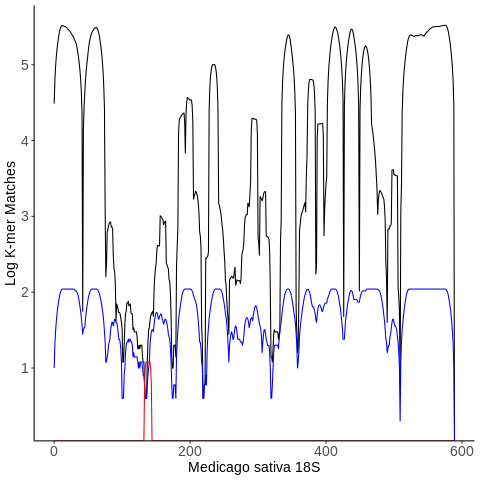

In [16]:
%%R -i gPNA

library('ggplot2')
axis_text_size = 14

plt<-ggplot(gPNA,aes(x=index,y=absolute.match))+
    geom_line()+
    geom_line(aes(y=unique.match),color='blue')+
    geom_line(aes(y=pna_map),color = 'red')+
    scale_y_log10(
      breaks = scales::trans_breaks("log10", function(x) 10^x),
      labels = scales::trans_format("log10", scales::math_format(.x)))+
    theme_bw()+
    theme(panel.border = element_blank(), panel.grid.minor = element_blank(),panel.grid.major = element_blank(),
       axis.line = element_line(color="black"),
       axis.text = element_text(size=axis_text_size),
       axis.title=element_text(size=axis_text_size))+
    labs(y="Log K-mer Matches",x="Medicago sativa 18S")
print(plt)
ggsave('figures/gPNA_protist.png',plot=plt,width=6,height=6,device='png',dpi=900)
